In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
train_data = pd.read_csv('V:\\SC324-2412\\train.csv')
test_data  = pd.read_csv('V:\\SC324-2412\\test.csv')
submit_data  = pd.read_csv('V:\\SC324-2412\\gender_submission.csv')

In [117]:
submit_data.head(2)

PassengerId  Survived
0          892         0
1          893         1

In [118]:
train_data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [119]:
test_data.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

In [120]:
categorical_columns = [c for c in train_data.columns if train_data[c].dtype.name == 'object']
numerical_columns   = [c for c in train_data.columns if train_data[c].dtype.name != 'object']

In [121]:
print('categorical_columns: ', categorical_columns)
print('numerical_columns: ' , numerical_columns)

categorical_columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [122]:
train_data[categorical_columns].describe()

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [124]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data['Embarked'][train_data['Embarked'] == 'S'] = 1
train_data['Embarked'][train_data['Embarked'] == 'C'] = 2
train_data['Embarked'][train_data['Embarked'] == 'Q'] = 3

train_data['Sex'][train_data['Sex'] == 'male'] = 1
train_data['Sex'][train_data['Sex'] == 'female'] = 0

# cabin - заменить на 0 и 1 (0 - нет данных о каюте, 1 - есть данные о каюте)
train_data['Cabin'] = train_data['Cabin'].fillna(0)
train_data['Cabin'][train_data['Cabin'] != 0] = 1

C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/4199982045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'][train_data['Embarked'] == 'S'] = 1
C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/4199982045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'][train_data['Embarked'] == 'C'] = 2
C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/4199982045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [125]:
train_data[categorical_columns].describe()

Name  Sex  Ticket  Cabin  Embarked
count                       891  891     891    891       891
unique                      891    2     681      2         3
top     Braund, Mr. Owen Harris    1  347082      0         1
freq                          1  577       7    687       646

In [126]:
train_data[numerical_columns].describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [65]:
# age   - возраст, заменить на среднее или медианное значение

In [129]:
print(train_data['Age'].mean())
print(train_data['Age'].median())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

29.69911764705882
28.0


In [131]:
train_data[numerical_columns].describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [132]:
#Не забыть удалить passenger_id

In [111]:
#Pclass +
#Age +
#Parch +/-
#Fare +/-

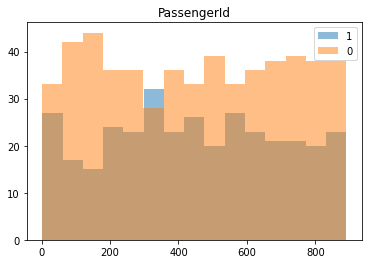

-------------


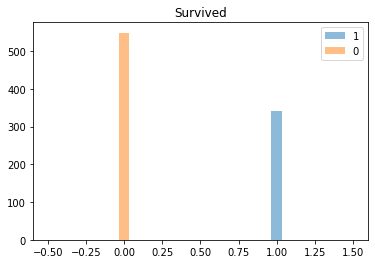

-------------


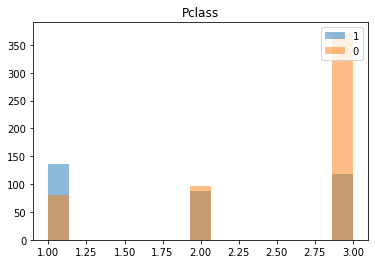

-------------


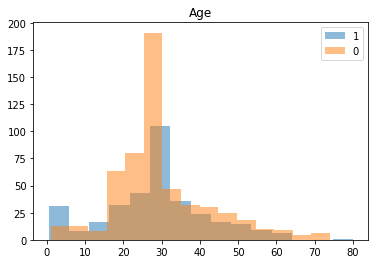

-------------


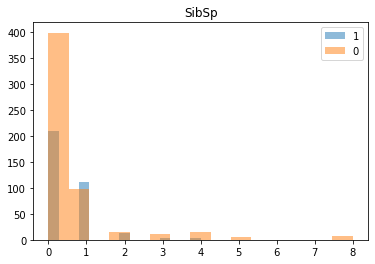

-------------


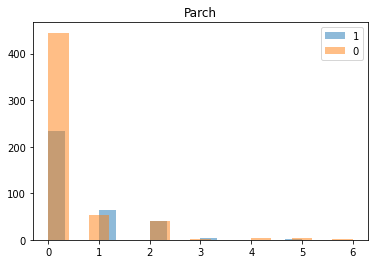

-------------


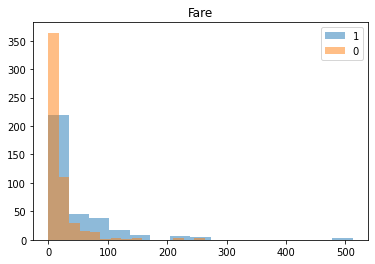

-------------


In [133]:
for feature_name in numerical_columns:
    bins = 15
    plt.title(feature_name)
    plt.hist(train_data[feature_name][train_data['Survived'] == 1], bins, alpha=0.5, label='1')
    plt.hist(train_data[feature_name][train_data['Survived'] == 0], bins, alpha=0.5, label='0')
    plt.legend(loc='upper right')
    plt.show()
    print('-------------')

In [113]:
#sex +
#cabin +
#embarked +/-

-------------


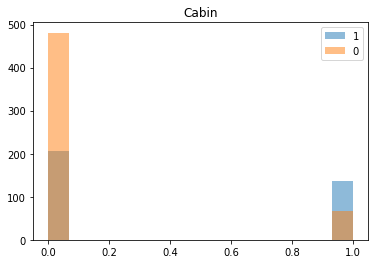

-------------


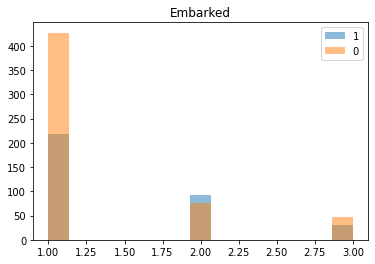

-------------


In [134]:
for feature_name in ['Sex', 'Cabin', 'Embarked']:
    bins = 15
    plt.title(feature_name)
    plt.hist(train_data[feature_name][train_data['Survived'] == 1], bins, alpha=0.5, label='1')
    plt.hist(train_data[feature_name][train_data['Survived'] == 0], bins, alpha=0.5, label='0')
    plt.legend(loc='upper right')
    plt.show()
    print('-------------')

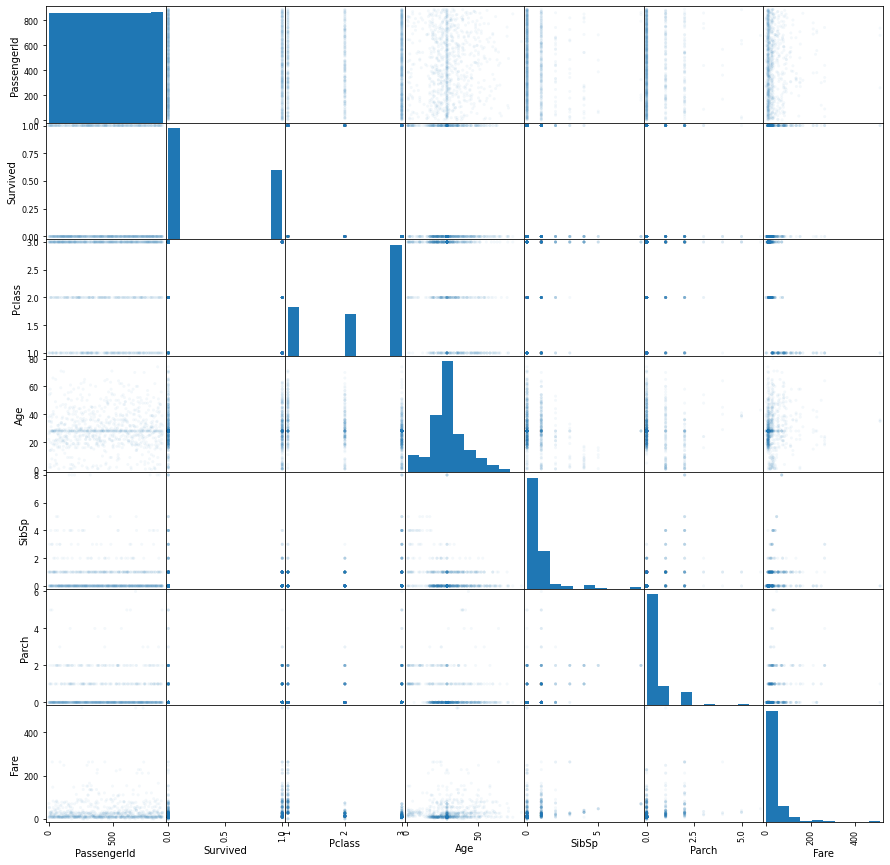

In [136]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data, alpha=0.05, figsize=(15, 15));

In [137]:
train_data.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [167]:
col1 = 'SibSp'
col2 = 'Age'
def custom_scatter_plot(data, col1, col2):

    plt.figure(figsize=(5, 5))
    plt.title(str([col1, col2]))
    plt.scatter(data[col1][data['Survived'] == 1],
                data[col2][data['Survived'] == 1],
                alpha=0.75,
                color='red',
                label='+')

    plt.scatter(data[col1][data['Survived'] == 0],
                data[col2][data['Survived'] == 0],
                alpha=0.75,
                color='blue',
                label='-')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='best')

In [170]:
import itertools
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
tmp = list(itertools.permutations(features, 2))

C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/1834368777.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


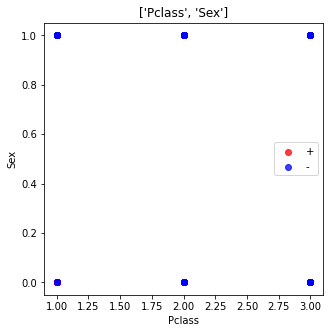

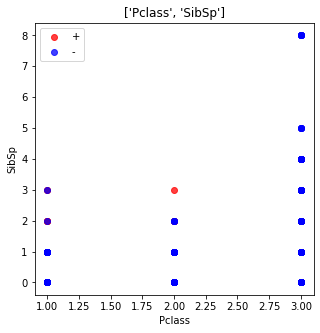

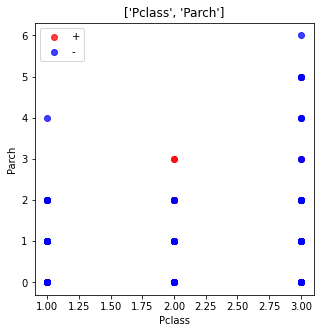

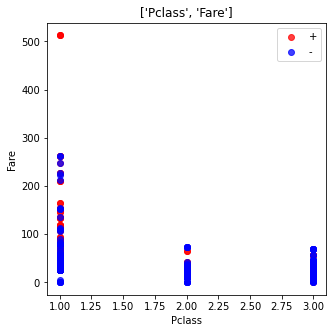

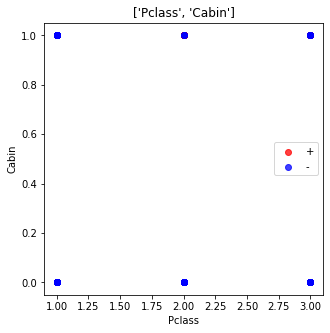

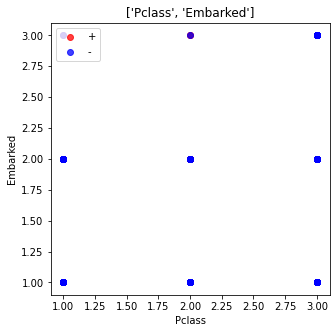

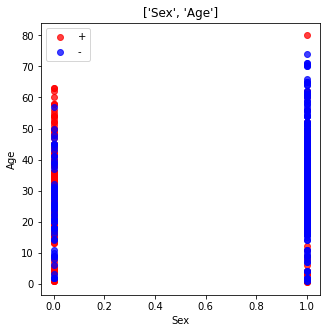

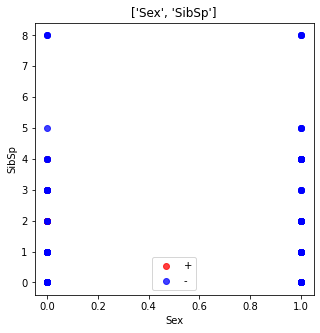

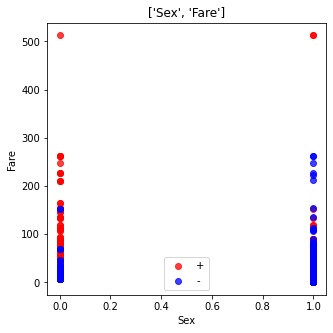

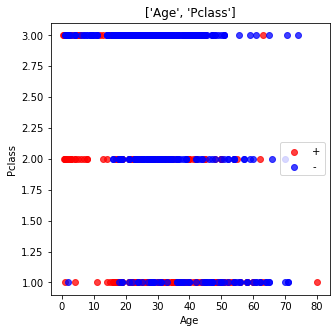

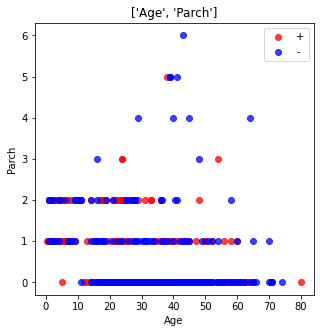

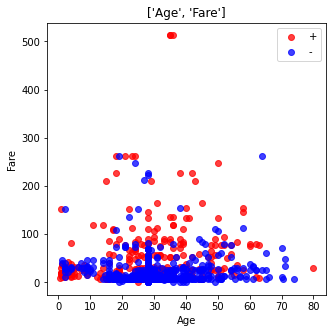

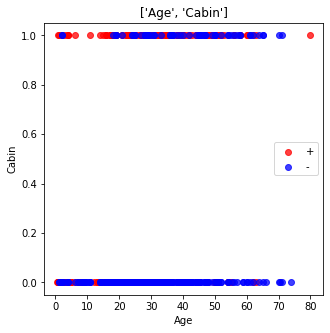

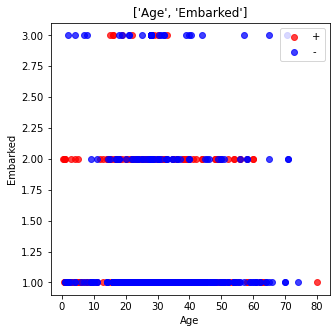

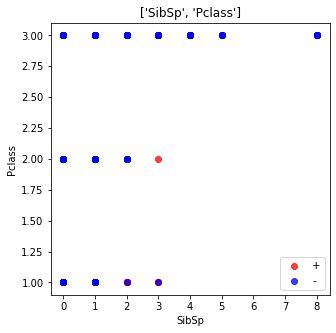

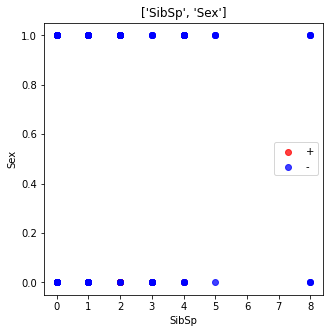

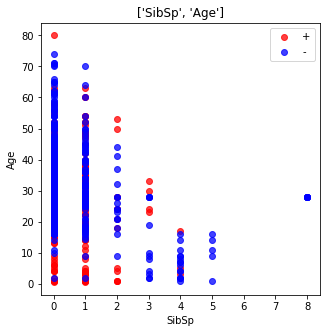

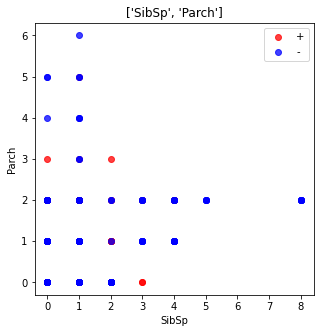

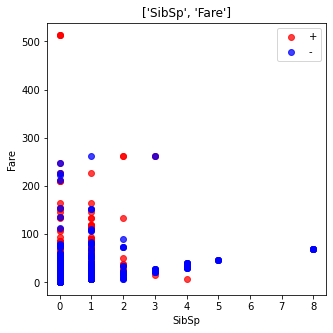

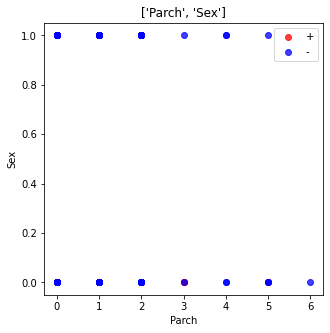

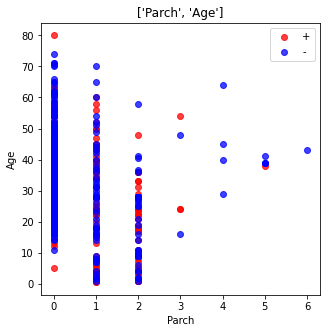

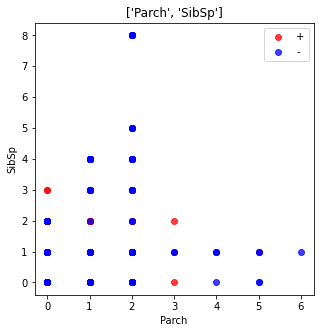

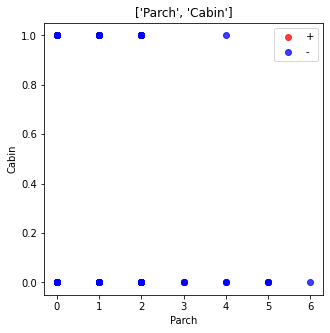

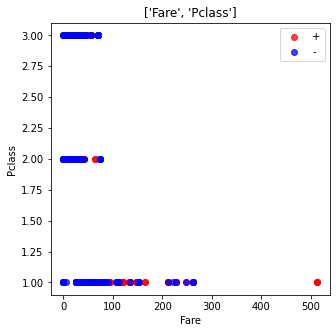

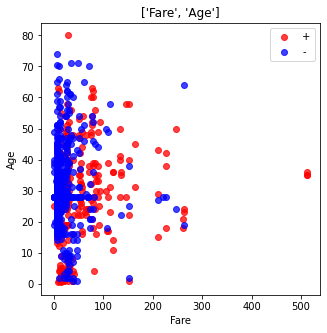

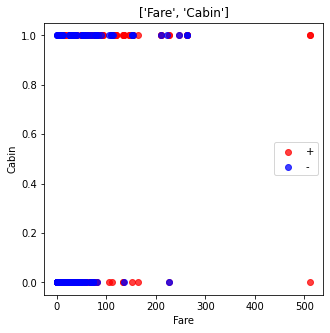

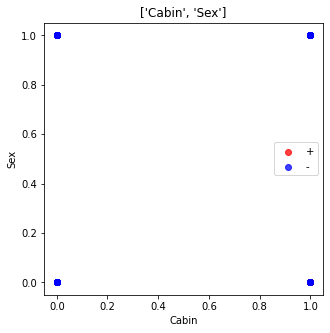

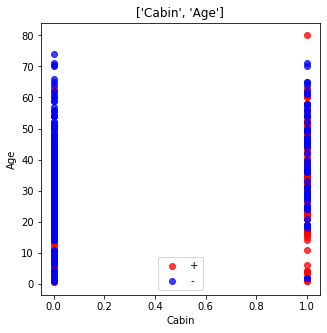

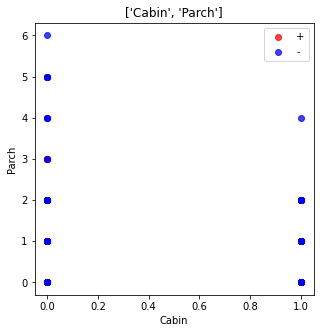

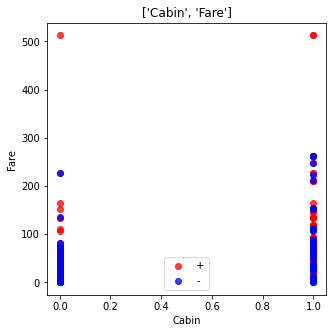

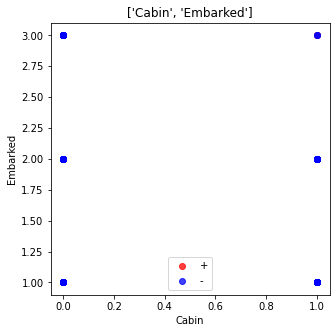

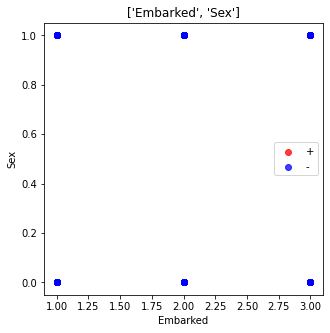

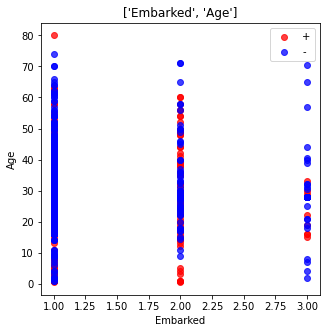

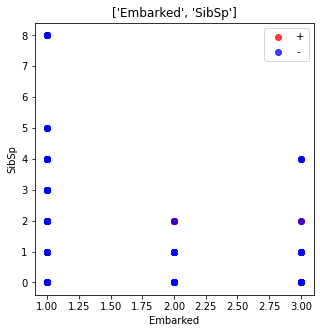

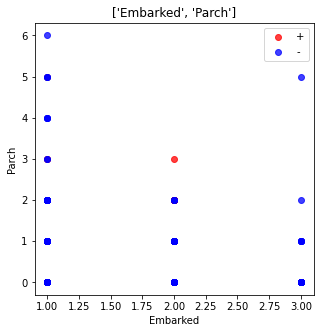

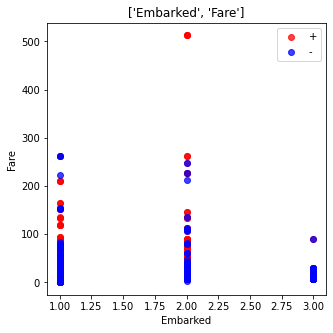

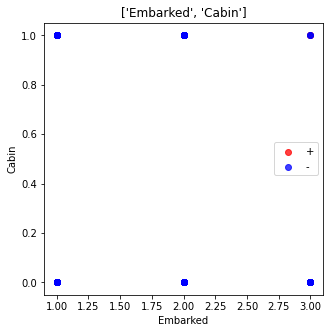

In [171]:
for i in tmp: 
    custom_scatter_plot(train_data, i[0], i[1])

In [172]:
print('categorical_columns: ', categorical_columns)
print('numerical_columns: ' , numerical_columns)

categorical_columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [173]:
# переопределили категориальные и количественные признаки
numerical = ['Age', 'Fare']
categorical = ['Cabin', 'Sex', 'Embarked', 'Parch', 'Pclass', 'SibSp']

In [ ]:
#sex +
#cabin +
#embarked +/-

#Pclass +
#Age +
#Parch +/-
#Fare +/-

In [224]:
# Выбрали признаки
numerical_final = ['Age', 'Fare']
categorical_final = ['Cabin', 'Sex', 'Embarked', 'Parch', 'Pclass']

In [225]:
binary_columns    = [c for c in categorical_final if len(np.unique(train_data[c])) == 2]
nonbinary_columns = [c for c in categorical_final if len(np.unique(train_data[c])) > 2]
print('binary_columns', binary_columns)
print('nonbinary_columns', nonbinary_columns)

binary_columns ['Cabin', 'Sex']
nonbinary_columns ['Embarked', 'Parch', 'Pclass']


In [226]:
data_nonbinary = pd.concat((pd.get_dummies(train_data['Pclass']), pd.get_dummies(train_data['Parch']), 
           pd.get_dummies(train_data['Embarked'])), axis=1)

In [227]:
data_nonbinary.head()

1  2  3  0  1  2  3  4  5  6  1  2  3
0  0  0  1  1  0  0  0  0  0  0  1  0  0
1  1  0  0  1  0  0  0  0  0  0  0  1  0
2  0  0  1  1  0  0  0  0  0  0  1  0  0
3  1  0  0  1  0  0  0  0  0  0  1  0  0
4  0  0  1  1  0  0  0  0  0  0  1  0  0

In [228]:
data_binary = train_data[binary_columns ]
data_binary.head()

Cabin Sex
0     0   1
1     1   0
2     0   0
3     1   0
4     0   1

In [229]:
data_numerical = train_data[numerical_final]
data_numerical = (data_numerical-data_numerical.max())/(data_numerical.min()-data_numerical.max())
data_numerical.head()

Age      Fare
0  0.728826  0.985849
1  0.527771  0.860864
2  0.678562  0.984531
3  0.565469  0.896356
4  0.565469  0.984287

In [230]:
final_train_data = pd.concat((data_binary, data_numerical, data_nonbinary), axis = 1)
final_train_data.head()

Cabin Sex       Age      Fare  1  2  3  0  1  2  3  4  5  6  1  2  3
0     0   1  0.728826  0.985849  0  0  1  1  0  0  0  0  0  0  1  0  0
1     1   0  0.527771  0.860864  1  0  0  1  0  0  0  0  0  0  0  1  0
2     0   0  0.678562  0.984531  0  0  1  1  0  0  0  0  0  0  1  0  0
3     1   0  0.565469  0.896356  1  0  0  1  0  0  0  0  0  0  1  0  0
4     0   1  0.565469  0.984287  0  0  1  1  0  0  0  0  0  0  1  0  0

In [231]:
test_data  = pd.read_csv('V:\\SC324-2412\\test.csv')

In [232]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

test_data['Embarked'] = test_data['Embarked'].fillna('S')
test_data['Embarked'][test_data['Embarked'] == 'S'] = 1
test_data['Embarked'][test_data['Embarked'] == 'C'] = 2
test_data['Embarked'][test_data['Embarked'] == 'Q'] = 3

test_data['Sex'][test_data['Sex'] == 'male'] = 1
test_data['Sex'][test_data['Sex'] == 'female'] = 0

# cabin - заменить на 0 и 1 (0 - нет данных о каюте, 1 - есть данные о каюте)
test_data['Cabin'] = test_data['Cabin'].fillna(0)
test_data['Cabin'][test_data['Cabin'] != 0] = 1

C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/3658052642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Embarked'][test_data['Embarked'] == 'S'] = 1
C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/3658052642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Embarked'][test_data['Embarked'] == 'C'] = 2
C:\Users\7272~1\AppData\Local\Temp/ipykernel_10456/3658052642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [250]:
data_nonbinary = pd.concat((pd.get_dummies(test_data['Pclass']), pd.get_dummies(test_data['Parch']), 
           pd.get_dummies(test_data['Embarked'])), axis=1)
data_binary = test_data[binary_columns]
data_numerical = test_data[numerical_final]
data_numerical = (data_numerical-data_numerical.max())/(data_numerical.min()-data_numerical.max())
final_test_data = pd.concat((data_binary, data_numerical, data_nonbinary), axis = 1)
final_test_data = final_test_data.fillna(0)
final_test_data = final_test_data.drop(9, axis = 1)

In [243]:
from sklearn.linear_model import LogisticRegression

In [236]:
X_train = np.array(final_train_data)
y_train = np.array(train_data['Survived'])

logregr = LogisticRegression()
logregr.fit(X_train, y_train)

LogisticRegression()

In [251]:
X_test = np.array(final_test_data)
y_test_pred = logregr.predict(X_test)

In [252]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [255]:
submit_data['y_pred'] = y_test_pred 

In [257]:
np.mean(submit_data['y_pred'] == submit_data['Survived'])

0.937799043062201

In [258]:
sum(submit_data['Survived'])

152

In [259]:
len(submit_data['Survived'])

418